<a href="https://colab.research.google.com/github/Sonujha092/Computer-Vision/blob/master/HacerearthImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [6]:
# from google.colab import files
# uploaded = files.upload()

Saving data.zip to data.zip


In [74]:
ls

dataset/  data.zip  sample_data/  submission.csv


In [0]:
# !unzip data.zip

In [29]:
import os
os.listdir('dataset')

['Train Images', 'Test Images', 'train.csv', 'test.csv']

In [0]:
data = (ImageList.from_csv('dataset','train.csv',folder='Train Images')
       .split_by_rand_pct()
       .label_from_df()
       .add_test_folder('Test Images')
       .transform(size=128)
       .databunch()
       .normalize(imagenet_stats))

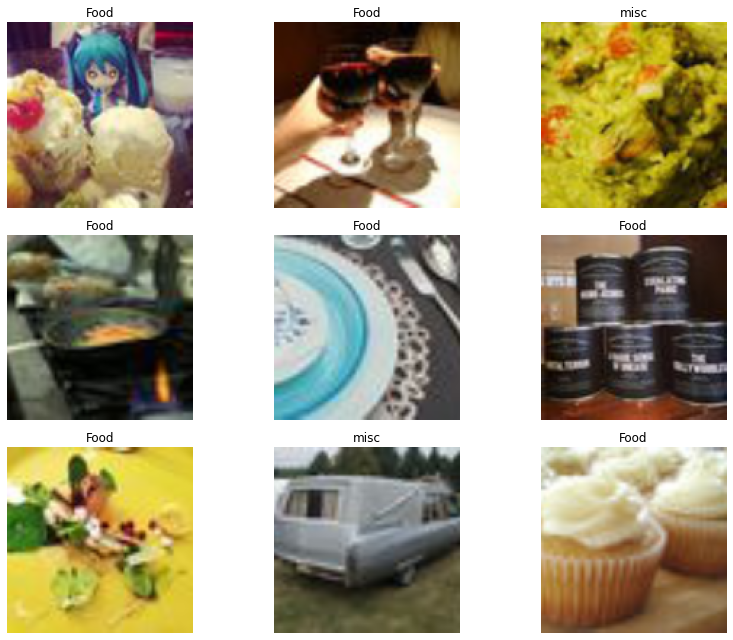

In [31]:
data.show_batch(3,figsize=(12,9))

In [32]:
data.classes

['Attire', 'Decorationandsignage', 'Food', 'misc']

In [35]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.211879,0.782631,0.746656,05:01
1,0.792085,0.672365,0.753344,05:00


In [0]:
learn.save('stage1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


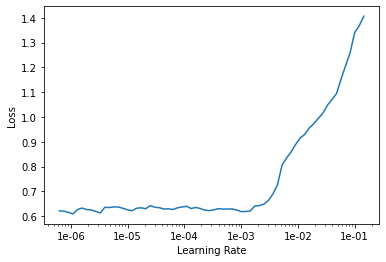

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.598955,0.628924,0.771739,07:10
1,0.472912,0.618973,0.780936,07:11


In [0]:
learn.save('stage2')

In [0]:
learn.export()

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

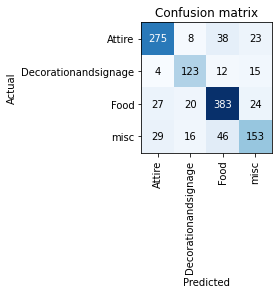

In [45]:
interp.plot_confusion_matrix()

**Prediction On Test Set**

In [46]:
os.listdir('dataset')

['Train Images',
 'export.pkl',
 'Test Images',
 'models',
 'train.csv',
 'test.csv']

In [62]:
test = ImageList.from_folder('dataset/Test Images')
len(test)

3219

In [63]:
learn = load_learner('dataset', test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [65]:
labelled_preds[:5]

['Food', 'Attire', 'misc', 'Attire Food', 'Attire']

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [0]:
df.to_csv('submission.csv', index=False)